## Supervised Learning with scikit-learn - Regression exercises
Some regression code snippets i have used for the Supervised Learning with scikit-learn course at Datacamp.

#### Building a simple linear regression model

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
Data contains:

TV promotion budget (in million)
Social Media promotion budget (in million)
Radio promotion budget (in million)
Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer
Sales (in million)
'''
sales_df = pd.read_csv("datasets/advertising_and_sales_clean.csv")

print(sales_df.head())

# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape, y.shape)

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18
(4546, 1) (4546,)


In [38]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

'''
As the goal is to assess the relationship between the feature and target values there is no need to split the data 
into training and test sets.
'''
# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


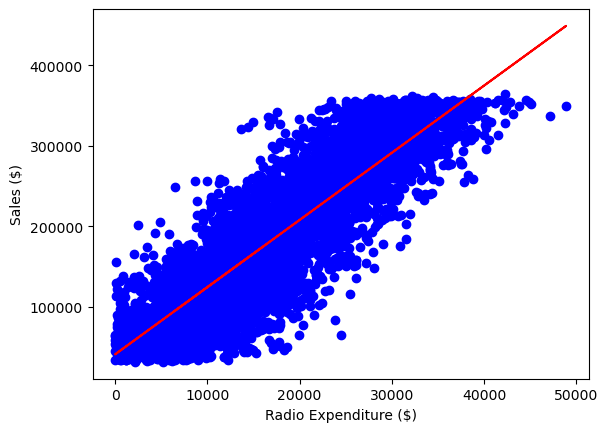

In [39]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

#### Building a multiple linear regression model and evaluating the results

In [40]:
from sklearn.model_selection import train_test_split 

# Create X and y arrays
# Just for practical purposes i have drop the influencer column because it is categorical.
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [41]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001238


#### Using Cross Validation
The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

In [42]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

X_cv = sales_df.drop(["sales","influencer"], axis=1).values
y_cv = sales_df["sales"].values

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg_cv = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg_cv, X_cv, y_cv, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [44]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]
